# Web console of models and actors

In [7]:
from dataclasses import dataclass, field
import enum
from interlab.queries import WebConsoleModel, query_model
from interlab.actor import WebConsoleActor
from treetrace import TracingNode

## Emulating a lang model with WebConsoleModel

`WebConsoleModel` allows you to play the part of a language model in a browser window. The interface looks like this:

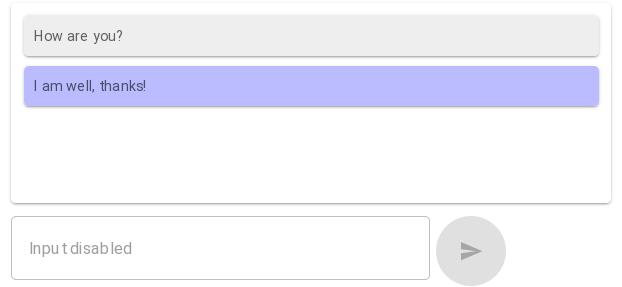

When you execute the `query_model` or a similar function, the call is blocked until you enter a response into the web console opened by the command below.

Note you can use Ctrl+Enter to submit the message.

In [9]:
model = WebConsoleModel("Web console")
model.display(height=350, width=500)

# This will let you enter your reply in the console, blocking the notebook util you do
# You can press Ctrl+Enter to send the message

with TracingNode("Querying a WebConsoleModel") as c:
    result = query_model(model, "How are you?")
    print(f"Returned: {result!r}")
c.display()

[2024-01-20 20:50:13,691] INFO(treetrace.ui.console_server): Created console UI at http://localhost:44679/console


Returned: 'I am well, thanks!'


## Emulating an Actor with WebConsoleActor

`WebConsoleActor` allows you to play the role of an `Actor`. Similarly to `WebConsoleModel`, when you execute the `query` method, it waits until you enter a response into the web console.

In addition to querying just for text, you can also query for a complex dataclass type, and the console will auto-generate a form for you to fill in, saving you typing the proper JSON response, as you can see here:

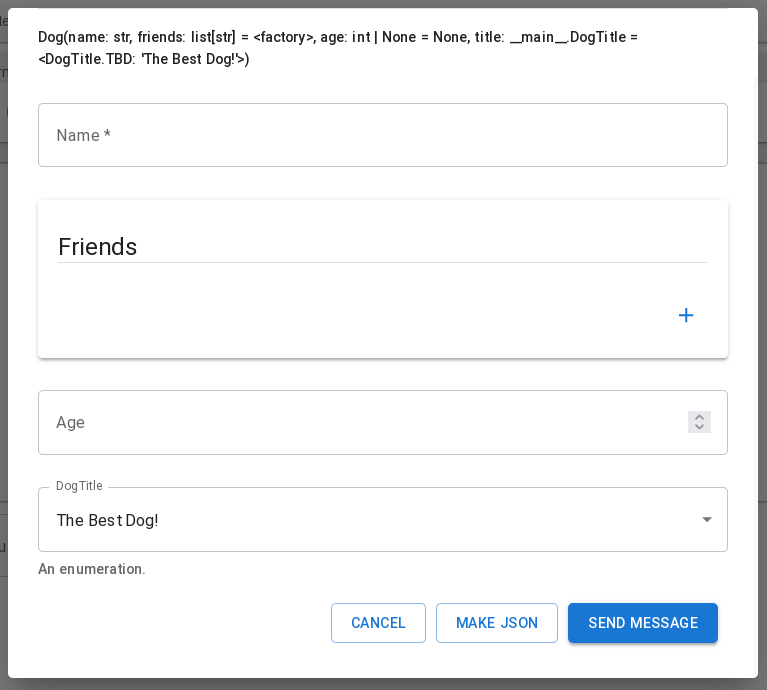

That is indeed much better than writing a JSON reply by hand - though that is always an option, and the form in fact merely generates the JSON for you.

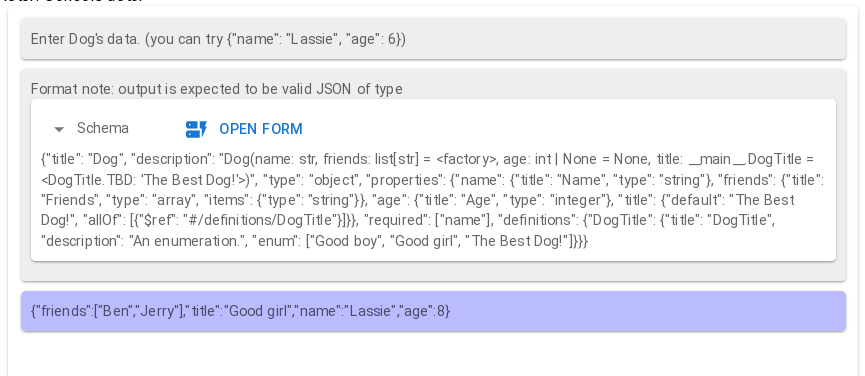

In [12]:
actor = WebConsoleActor("Console actor")
actor.display(height=600, width=700)

# Defining a dataclass, along with an Enum, just for show

class DogTitle(enum.Enum):
    GB = "Good boy"
    GG = "Good girl"
    TBD = "The Best Dog!"
    
@dataclass
class Dog:
    name: str
    friends: list[str] = field(default_factory=list)
    age: int | None = None
    title: DogTitle = DogTitle.TBD


with TracingNode("Querying a WebConsoleActor for a typed action") as c:
    # Note: Some features like repetion on validation failure are WIP for the console actor
    a = actor.query('Enter Dog\'s data. (you can try {"name": "Lassie", "age": 6})', expected_type=Dog)
    print(f"Returned: {a!r}")
    
c.display()

[2024-01-20 21:01:05,460] INFO(treetrace.ui.console_server): Created console UI at http://localhost:45801/console


Returned: Dog(name=Dog(name='Lassie', friends=['Ben', 'Jerry'], age=8, title=<DogTitle.GG: 'Good girl'>), friends=[], age=None, title=<DogTitle.TBD: 'The Best Dog!'>)
